# Abstract:
   ##### To predict a mushroom is edible or poisonus

# importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

# Loading the DataSet

In [2]:
mush = pd.read_csv("mushroom.csv")
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mush.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
#intialize df1 using pop function
df1 = mush.pop("class")

In [5]:
#adding class column as the last column 
mush["class"] = df1

In [6]:
mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [7]:
columns_name = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class']
for values in columns_name:
    print(np.unique(mush[values]))
    
    

['b' 'c' 'f' 'k' 's' 'x']
['f' 'g' 's' 'y']
['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
['f' 't']
['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
['a' 'f']
['c' 'w']
['b' 'n']
['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
['e' 't']
['?' 'b' 'c' 'e' 'r']
['f' 'k' 's' 'y']
['f' 'k' 's' 'y']
['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
['p']
['n' 'o' 'w' 'y']
['n' 'o' 't']
['e' 'f' 'l' 'n' 'p']
['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
['a' 'c' 'n' 's' 'v' 'y']
['d' 'g' 'l' 'm' 'p' 'u' 'w']
['e' 'p']


In [8]:


mush.tail()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p
8123,x,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,o,c,l,e


In [9]:
# check the shape of the dataframe:
mush.shape

(8124, 23)

### we have 8124 records/rows and 23 attributes/columns

# Identify the types of problems(Regression/Classification)

In [10]:
# check fot the dtype of attribute
mush.dtypes

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
class                       object
dtype: object

#####  there are 23 attributes one of which is a target column : "class" all the columns can be categorized to be categorical variables and hence the learning methos is : classification
  - supervised/classification
     ##### the evaluation metrics are:
        - accuracy score
        - confusion matric
        - classification report

# EDA - Exploratory Data Analysis

#### summary statistics

In [11]:
mush.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208





- since all the attributes are categorical the summary statistics observation are:
    - count : There are 8124 records
    - frequency :  varies for each column

##### univariate analysis

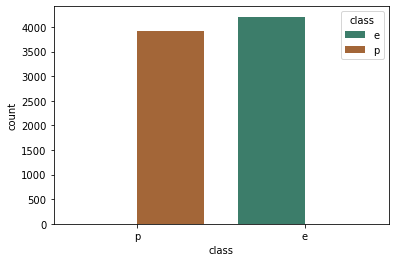

In [12]:
# plot a bar chart for class attribute
sns.countplot(x = "class", color = "red", palette = "Dark2",saturation=0.50,  hue = "class", data= mush, hue_order= ['e','p'])
plt.show()


- the Bar plot idicates the dataset has:
    - nearly 3900 mushroom species which are poisonus
    - above 4000 muhroom species which are edible

Considering the dataset to be completely categorical. The solution to train a better performing model is:
    - Label encoding
    - standard scaling
   
with this we can convert the attributes to numerical data;train the model accordingly.


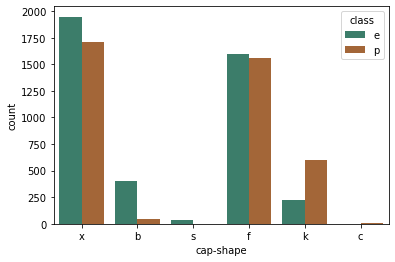

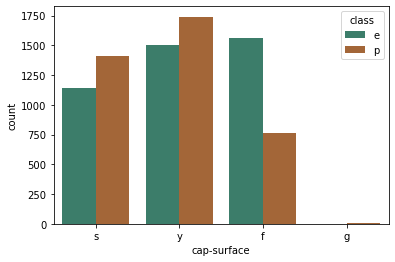

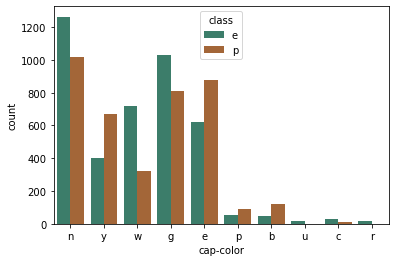

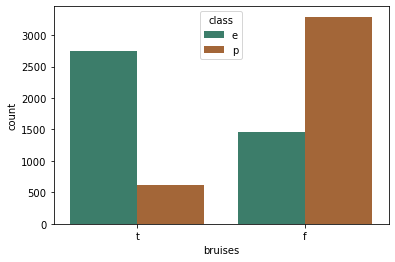

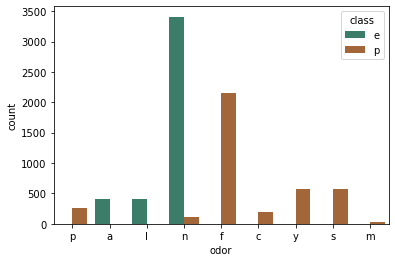

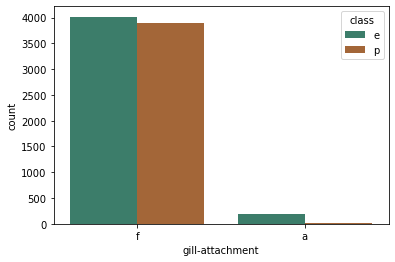

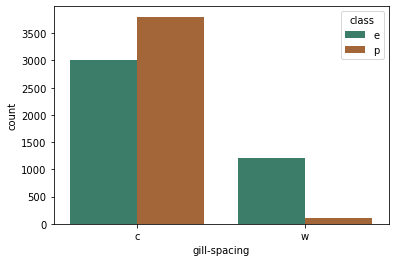

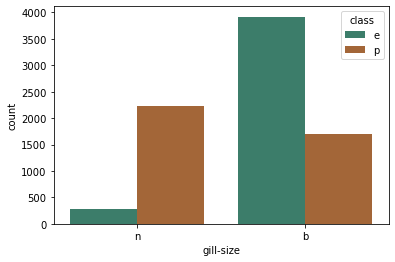

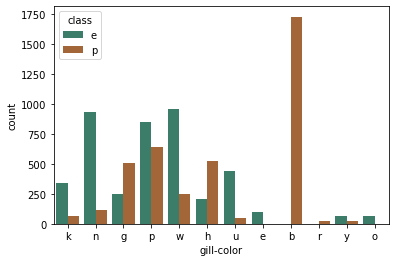

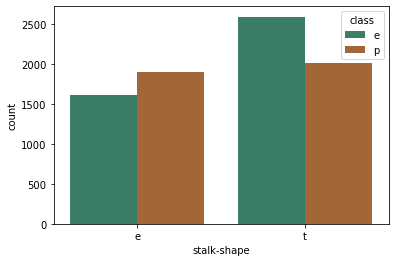

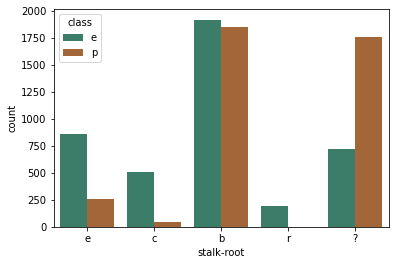

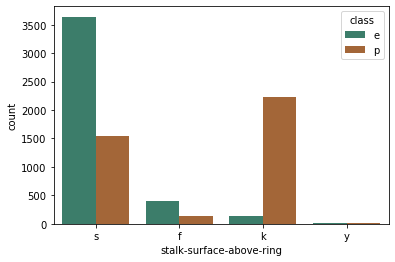

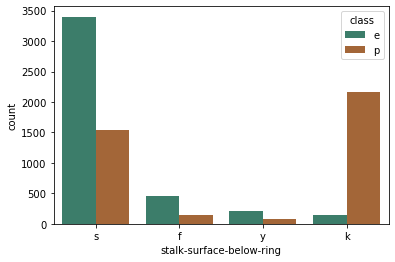

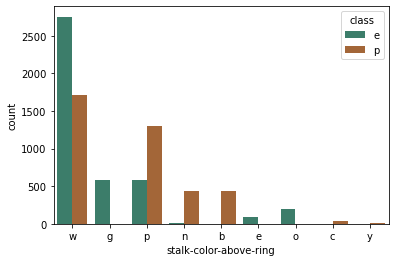

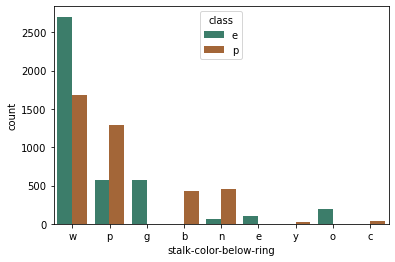

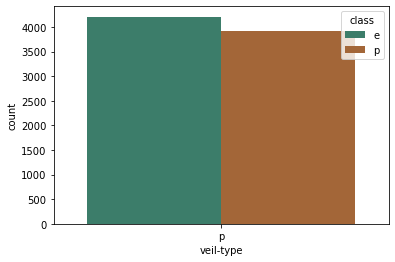

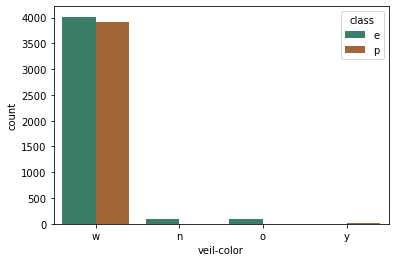

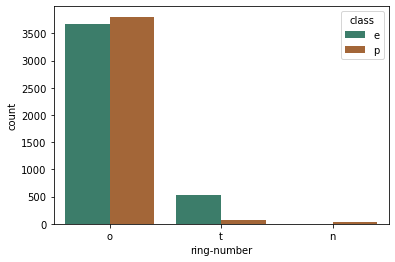

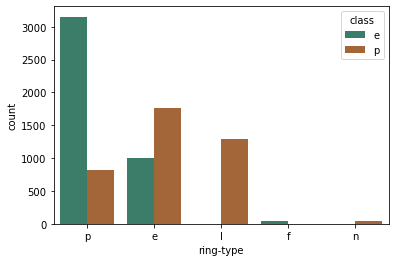

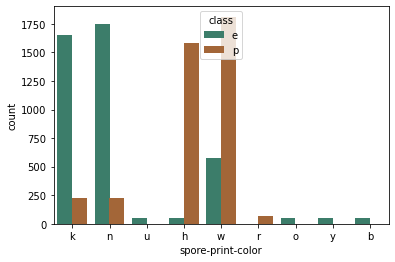

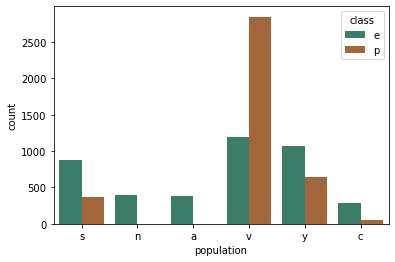

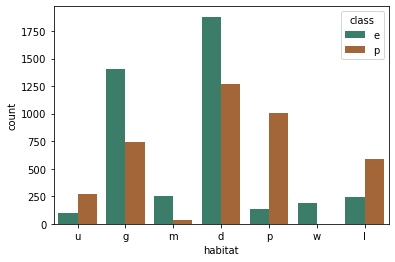

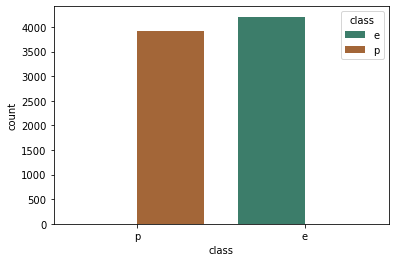

In [13]:
# plot a bar chart for class attribute
for values in columns_name:
    sns.countplot(x = values, color = "red", palette = "Dark2",saturation=0.50,  hue ="class", data= mush, hue_order= ['e','p'])
    plt.show()

## Observations
- Each column represent various count of values and the bar graph is plot with respect to the class variables.
- considering  a few examples

##### cap-shape:
    - The cap-shape under x, b, f,k exibhit both edible and poisonus classes
    - The cap-shape under s and c exibiht edible or poisonus class
##### cap-surface:
    - The cap-surface uder s, y, f,exibhit both edible and poisonus classes
    - The cap-surface uder g exibhit only poisonus class
##### bruisesL
     -The bruises category t, f both exibhit edible and poisonus classes
##### odor:
     - The column order mostly represent posisonus class.
     - The odor category n plays a major role in categorizing edible class
- Rest of the bar-chart represent the class variable and its relationship with other independent variables

#### Label encoding

In [14]:
#import label encoder
from sklearn.preprocessing import LabelEncoder

#intiatilize label encoder
LE = LabelEncoder()

#create a for loop to change the categorical variables into numerical variables
columns_name = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class']
for value in columns_name:
    mush[value] = LE.fit_transform(mush[value])

mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


##### Label encoding is done and the dataset is now converted to a numerical dataset suitable for modeling
 - further analysis will make the process more refined

In [15]:
for values in columns_name:
    print(np.unique(mush[values]))
    
    

[0 1 2 3 4 5]
[0 1 2 3]
[0 1 2 3 4 5 6 7 8 9]
[0 1]
[0 1 2 3 4 5 6 7 8]
[0 1]
[0 1]
[0 1]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[0 1]
[0 1 2 3 4]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5 6 7 8]
[0]
[0 1 2 3]
[0 1 2]
[0 1 2 3 4]
[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6]
[0 1]


- class:
      - 0: edible
      - 1: poisonus
        
        
        

#### Bi-variate analysis

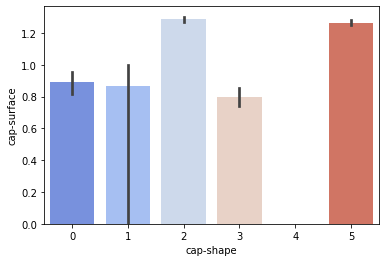

In [16]:
# plot a bar plot between cap-shape and cap-surface 
sns.barplot(x='cap-shape', y='cap-surface', data=mush, palette = "coolwarm", estimator = np.std)
plt.show()


- the bivariate analysis for the columns cap-surface and cap-shape suggest that:
     -  cap shape sized 2 covers more of the cap-surface
- To extensively understand the variation and relationship multivariate analysis can be done


#### multivariate analysis

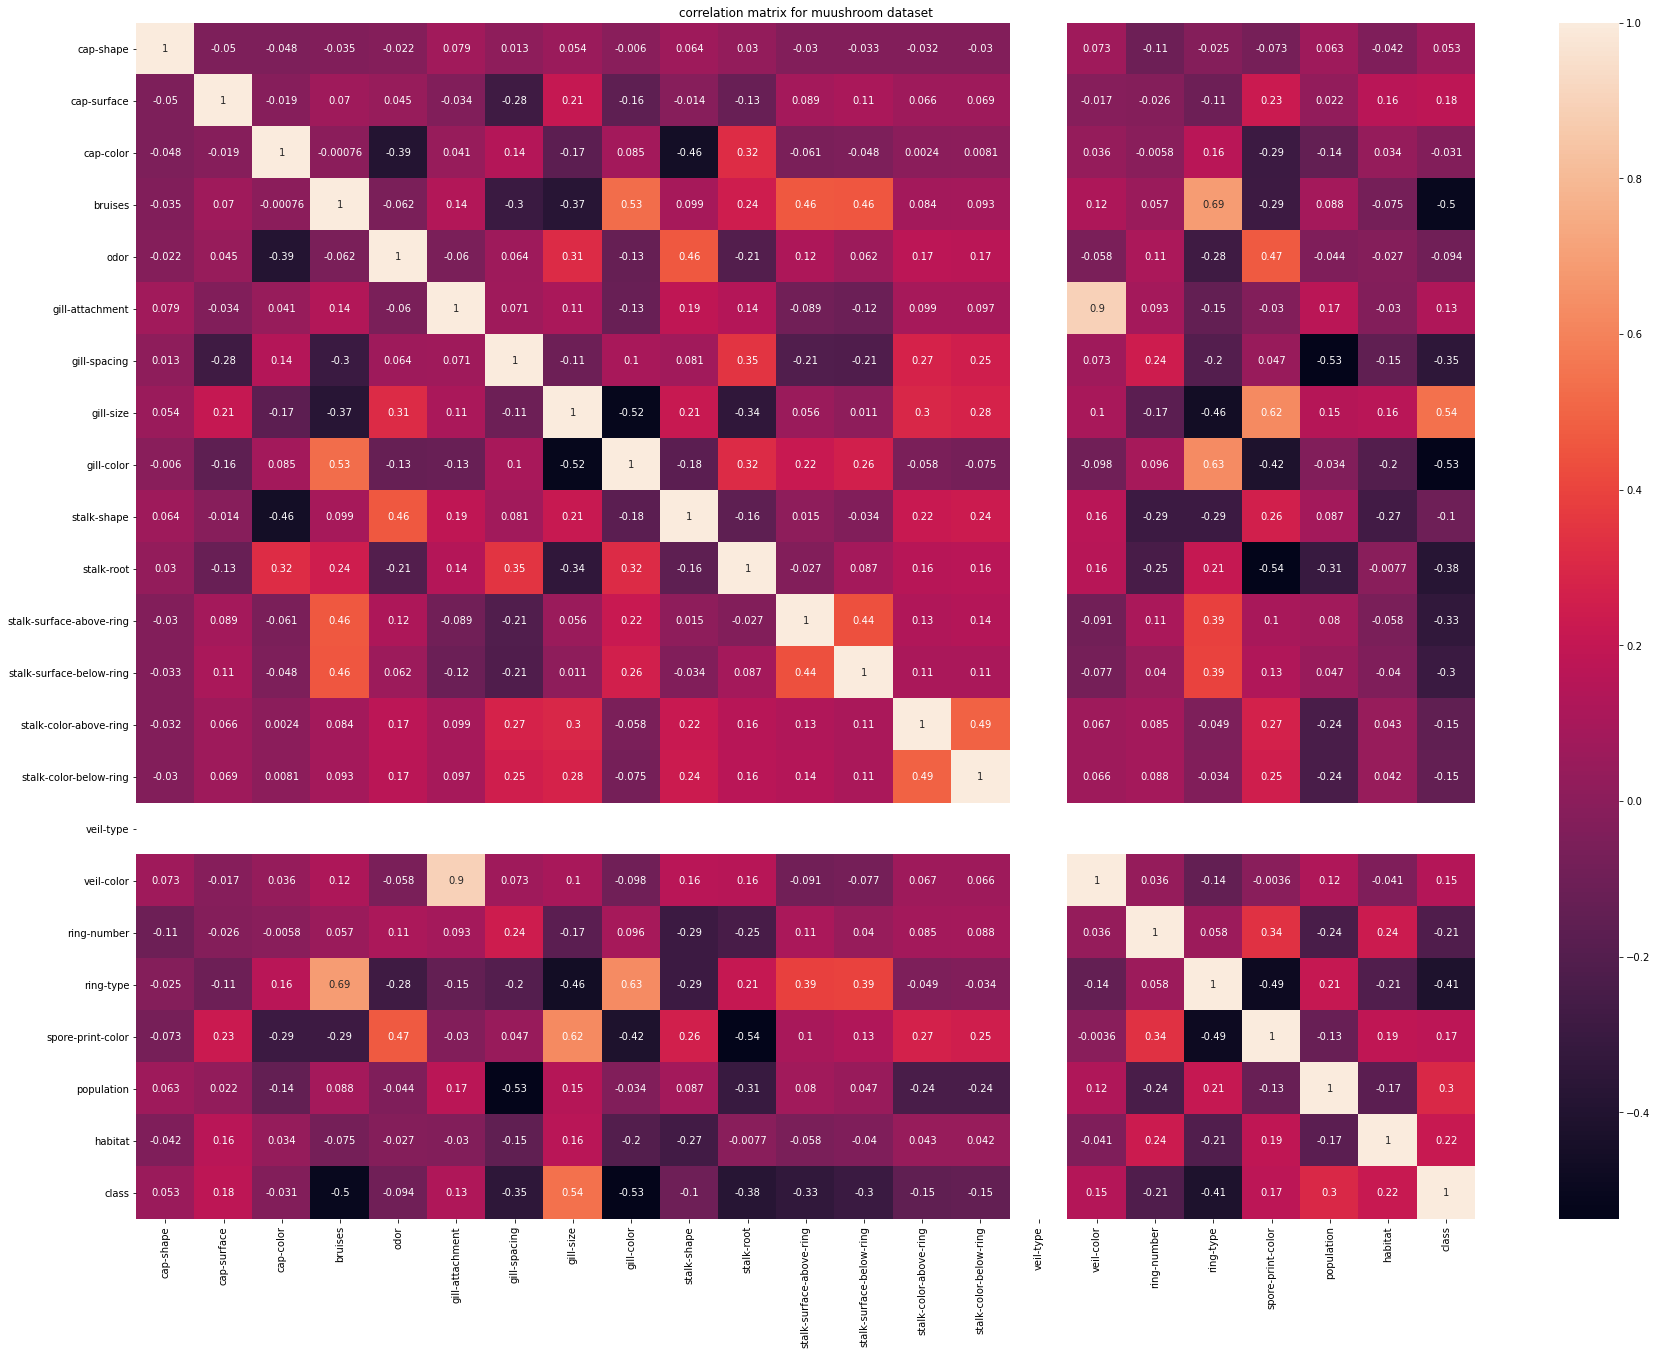

In [17]:
# plot heatmap to find the correlation
corr_mat = mush.corr()

plt.figure(figsize=[30,22])
sns.heatmap(corr_mat, annot=True)
plt.title("correlation matrix for muushroom dataset")
plt.show()

- the heat map descirbes the correlation between all the columns.
- the column veil type has no correlation with the dataset
    - It is neither negatively correlated nor positively correlated
- so, dropping veil type from the mushroom data will positively impact the model performance


In [18]:
discard = mush.pop("veil-type")

In [19]:
mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,2,1,0,3,0,1,0


In [20]:
mush.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

- veil type dropped

In [21]:
mush.shape

(8124, 22)

- Now there are 22 columns in the dataset


In [22]:
# find the correlaion of class variable with other variables
corr_matrix = mush.corr()
corr_matrix["class"].sort_values(ascending= False)
#higest - lowest

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64

- There are negative and positive correlation present 

In [23]:
#sns.pairplot(mush)

# Data Cleaning

### Treating missing values

In [24]:
mush.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [25]:
mush.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

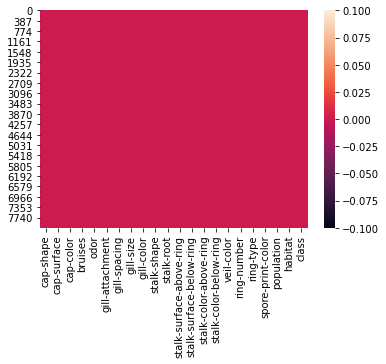

In [26]:
sns.heatmap(mush.isnull())

- observations:
     - There are no null values in the dataset

### Checking skewness and removal

#### The dataset is a catgorical dataset and hense there will be no skewness present in the dataset we can proceed to removal of outliers

# Checking Outlier and removal

In [27]:
#splitting the indendent and dependent variables
x = mush.drop("class", axis = 1)
y = mush["class"]


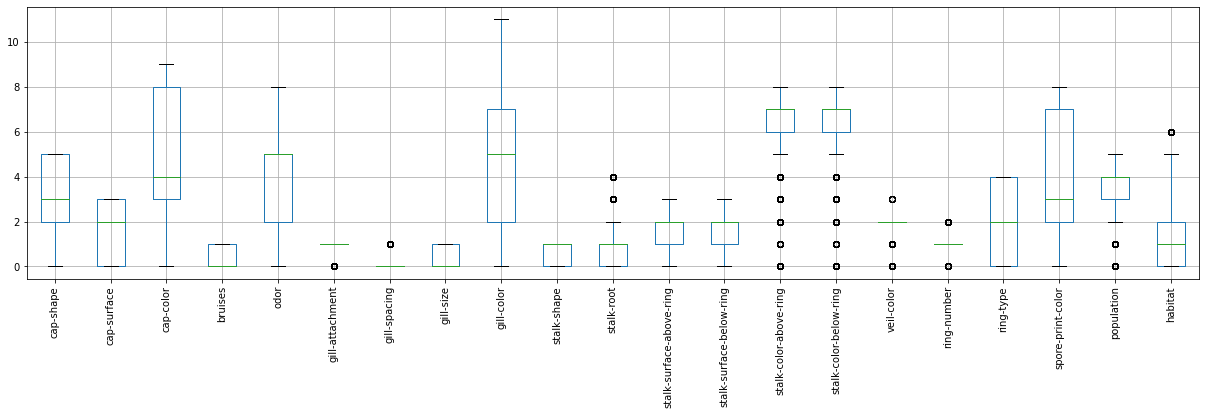

In [28]:
# ploting box plot for the attributes
x.boxplot(figsize = [21,5])
plt.xticks(rotation=90)
plt.show()

#### outlier are presen in the data
There are few outlier present in the dataset. proccessed with z-score method to remove the possible outliers

In [29]:
# z-score to find the outlier
from scipy import stats
import numpy as np

z= np.abs(stats.zscore(x))
print(z)

[[1.02971224 0.14012794 0.19824983 ... 0.67019486 0.5143892  2.03002809]
 [1.02971224 0.14012794 1.76587407 ... 0.2504706  1.31310821 0.29572966]
 [2.08704716 0.14012794 1.37304929 ... 0.2504706  1.31310821 0.86714922]
 ...
 [0.8403434  0.14012794 0.19824983 ... 1.50964337 2.11182722 0.28570978]
 [0.21699152 0.95327039 0.19824983 ... 1.42842641 0.28432981 0.28570978]
 [1.02971224 0.14012794 0.19824983 ... 0.16925365 2.11182722 0.28570978]]


In [30]:
#define a thershold to identify the outlier
thershold = 3
print(np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([14, 13, 14, ..., 15,  5, 15], dtype=int64))


In [31]:
x = x[(z<3).all(axis=1)]

In [32]:
y =y[(z<3).all(axis=1)]

In [33]:
x.shape

(6568, 21)

In [34]:
y.shape

(6568,)

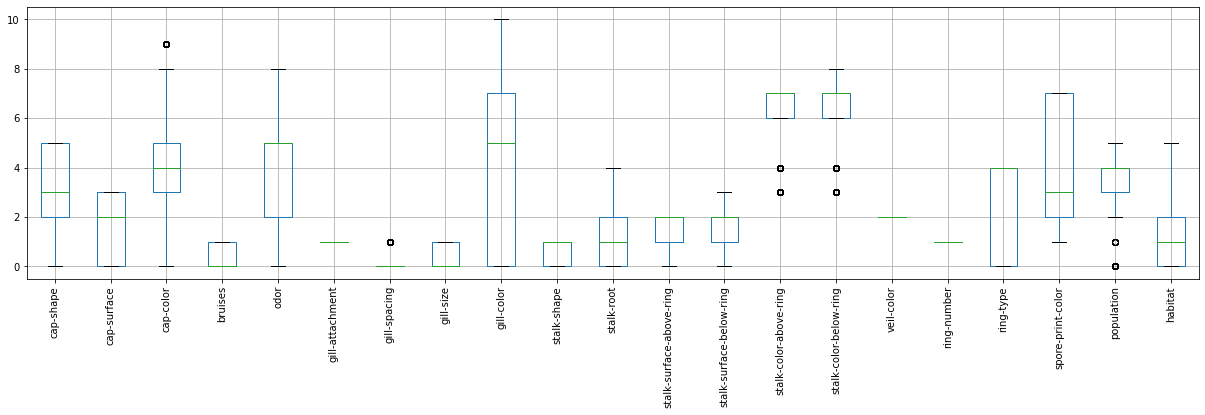

In [38]:
# ploting box plot for the attributes
x.boxplot(figsize = [21,5])
plt.xticks(rotation=90)
plt.show()

# Finding the best-random state:

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc = accuracy_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.9690512430238457  on Random State  132


### create train_test split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 132)

In [41]:
x_test.shape

(1971, 21)

In [42]:
y_test.shape

(1971,)

In [43]:
x_train.shape

(4597, 21)

In [44]:
y_train.shape

(4597,)

# Finding the best Algorithm

In [45]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.9690512430238457
[[1030   38]
 [  23  880]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1068
           1       0.96      0.97      0.97       903

    accuracy                           0.97      1971
   macro avg       0.97      0.97      0.97      1971
weighted avg       0.97      0.97      0.97      1971



In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

1.0
[[1068    0]
 [   0  903]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1068
           1       1.00      1.00      1.00       903

    accuracy                           1.00      1971
   macro avg       1.00      1.00      1.00      1971
weighted avg       1.00      1.00      1.00      1971



In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

1.0
[[1068    0]
 [   0  903]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1068
           1       1.00      1.00      1.00       903

    accuracy                           1.00      1971
   macro avg       1.00      1.00      1.00      1971
weighted avg       1.00      1.00      1.00      1971



In [48]:
from sklearn.svm import SVC

svc = SVC(kernel = "linear", probability = True)
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print(accuracy_score(y_test, ad_pred))
print(confusion_matrix(y_test, ad_pred))
print(classification_report(y_test, ad_pred))



0.9776763064434297
[[1046   22]
 [  22  881]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1068
           1       0.98      0.98      0.98       903

    accuracy                           0.98      1971
   macro avg       0.98      0.98      0.98      1971
weighted avg       0.98      0.98      0.98      1971



In [49]:
from sklearn.model_selection import cross_val_score

lr_scr = cross_val_score(LR, x, y, cv = 5)
print("the cross validation score of Logisting regression model :", lr_scr.mean())

the cross validation score of Logisting regression model : 0.9171886103257322


In [50]:
from sklearn.model_selection import cross_val_score

dt_scr = cross_val_score(dt, x, y, cv = 5)
print("the cross validation score of Decision tree model :", dt_scr.mean())

the cross validation score of Decision tree model : 0.969550253233964


In [51]:
from sklearn.model_selection import cross_val_score

rf_scr = cross_val_score(rf, x, y, cv = 5)
print("the cross validation score of random forest model :", rf_scr.mean())

the cross validation score of random forest model : 0.9464120068487354


In [52]:
from sklearn.model_selection import cross_val_score

cv_scr = cross_val_score(svc, x, y, cv = 5)
print("the cross validation score of svc model :", cv_scr.mean())

the cross validation score of svc model : 0.9249522107110606


#### Considering the difference between acrual accuracy score and cross-validation accuracy score
##### decision tress classifier present the best fit of all models the same is explained in the following visuvalization

#### visuvalizing thr difference between training score and cross_val score

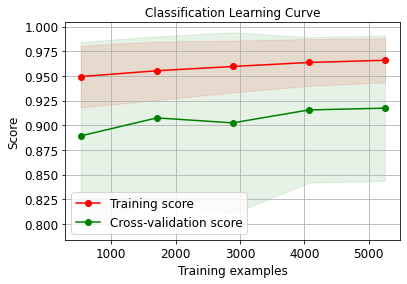

In [54]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(LR, x, y,
                                     cv=5, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve");

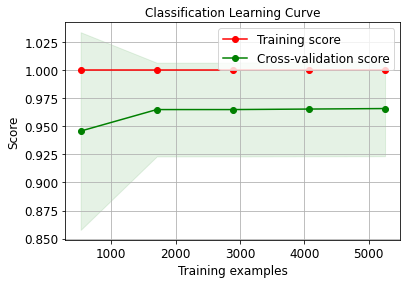

In [55]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(dt, x, y,
                                     cv=5, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve");

- observation:
    - score difference between decision tree classifier actual accuracy and cross validation score is the least of all models and that clearly visible in theabove classification learning curev
    

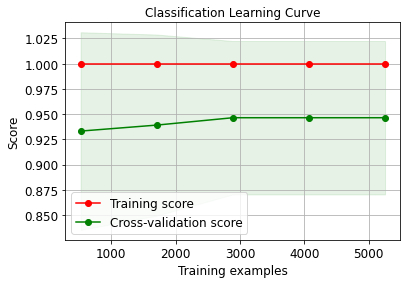

In [56]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(rf, x, y,
                                     cv=5, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve");

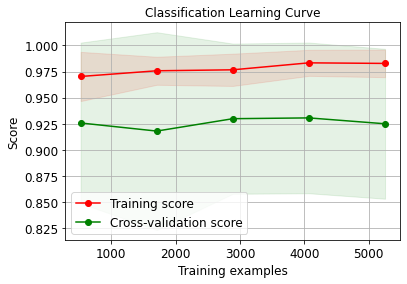

In [57]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(svc, x, y,
                                     cv=5, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve");

#### visuvalizing underfitting and over fitting model

#### Calibration Curve/Reliability Curves


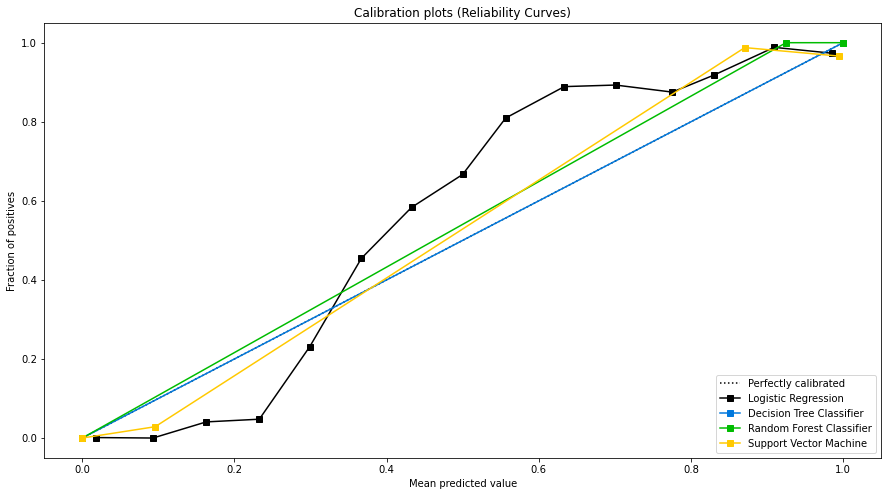

In [60]:
lr_prob = LR.fit(x_train,y_train).predict_proba(x_test)
dt_prob = dt.fit(x_train,y_train).predict_proba(x_test)
rf_prob = rf.fit(x_train,y_train).predict_proba(x_test)
svc_prob = svc.fit(x_train,y_train).predict_proba(x_test)
probas_list = [lr_prob,dt_prob,rf_prob,svc_prob]
clf_names = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Support Vector Machine']
skplt.metrics.plot_calibration_curve(y_test,
                                     probas_list,
                                     clf_names, n_bins=15,
                                     figsize=(15,8)
                                     );

- the calibration curve compare various model performance. The perfectly calibrated line (dashed line) seprates the overfitted and under fitted model
   - the line above threshold are overfitted
   - the line below the threshold are under fitted
Observations:
     - Decision Tree classifier is the best fit model. It sits right on the perfectly calibrated line.
      

### decision tree model -  Best Fit Model

# Hyper Parameter tuning

In [64]:
# Since decision tree algorithm us already a perfect fit hyper parameter tuning is optional

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
#creating parameters list to pass in Grid SearchCV

parameters = {'max_depth': np.arange(2,15),
              "criterion": ["gini","entropy"]
    
}

In [67]:
GCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)

In [68]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [69]:
GCV.best_params_
#printing the best parameter found by GridSearchCV

{'criterion': 'gini', 'max_depth': 6}

In [70]:
GCV_pred = GCV.best_estimator_.predict(x_test)

In [71]:
accuracy_score(y_test, GCV_pred)

1.0

###  Visuvalization of decision tree classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [73]:
# decision tree classifier visuvalization

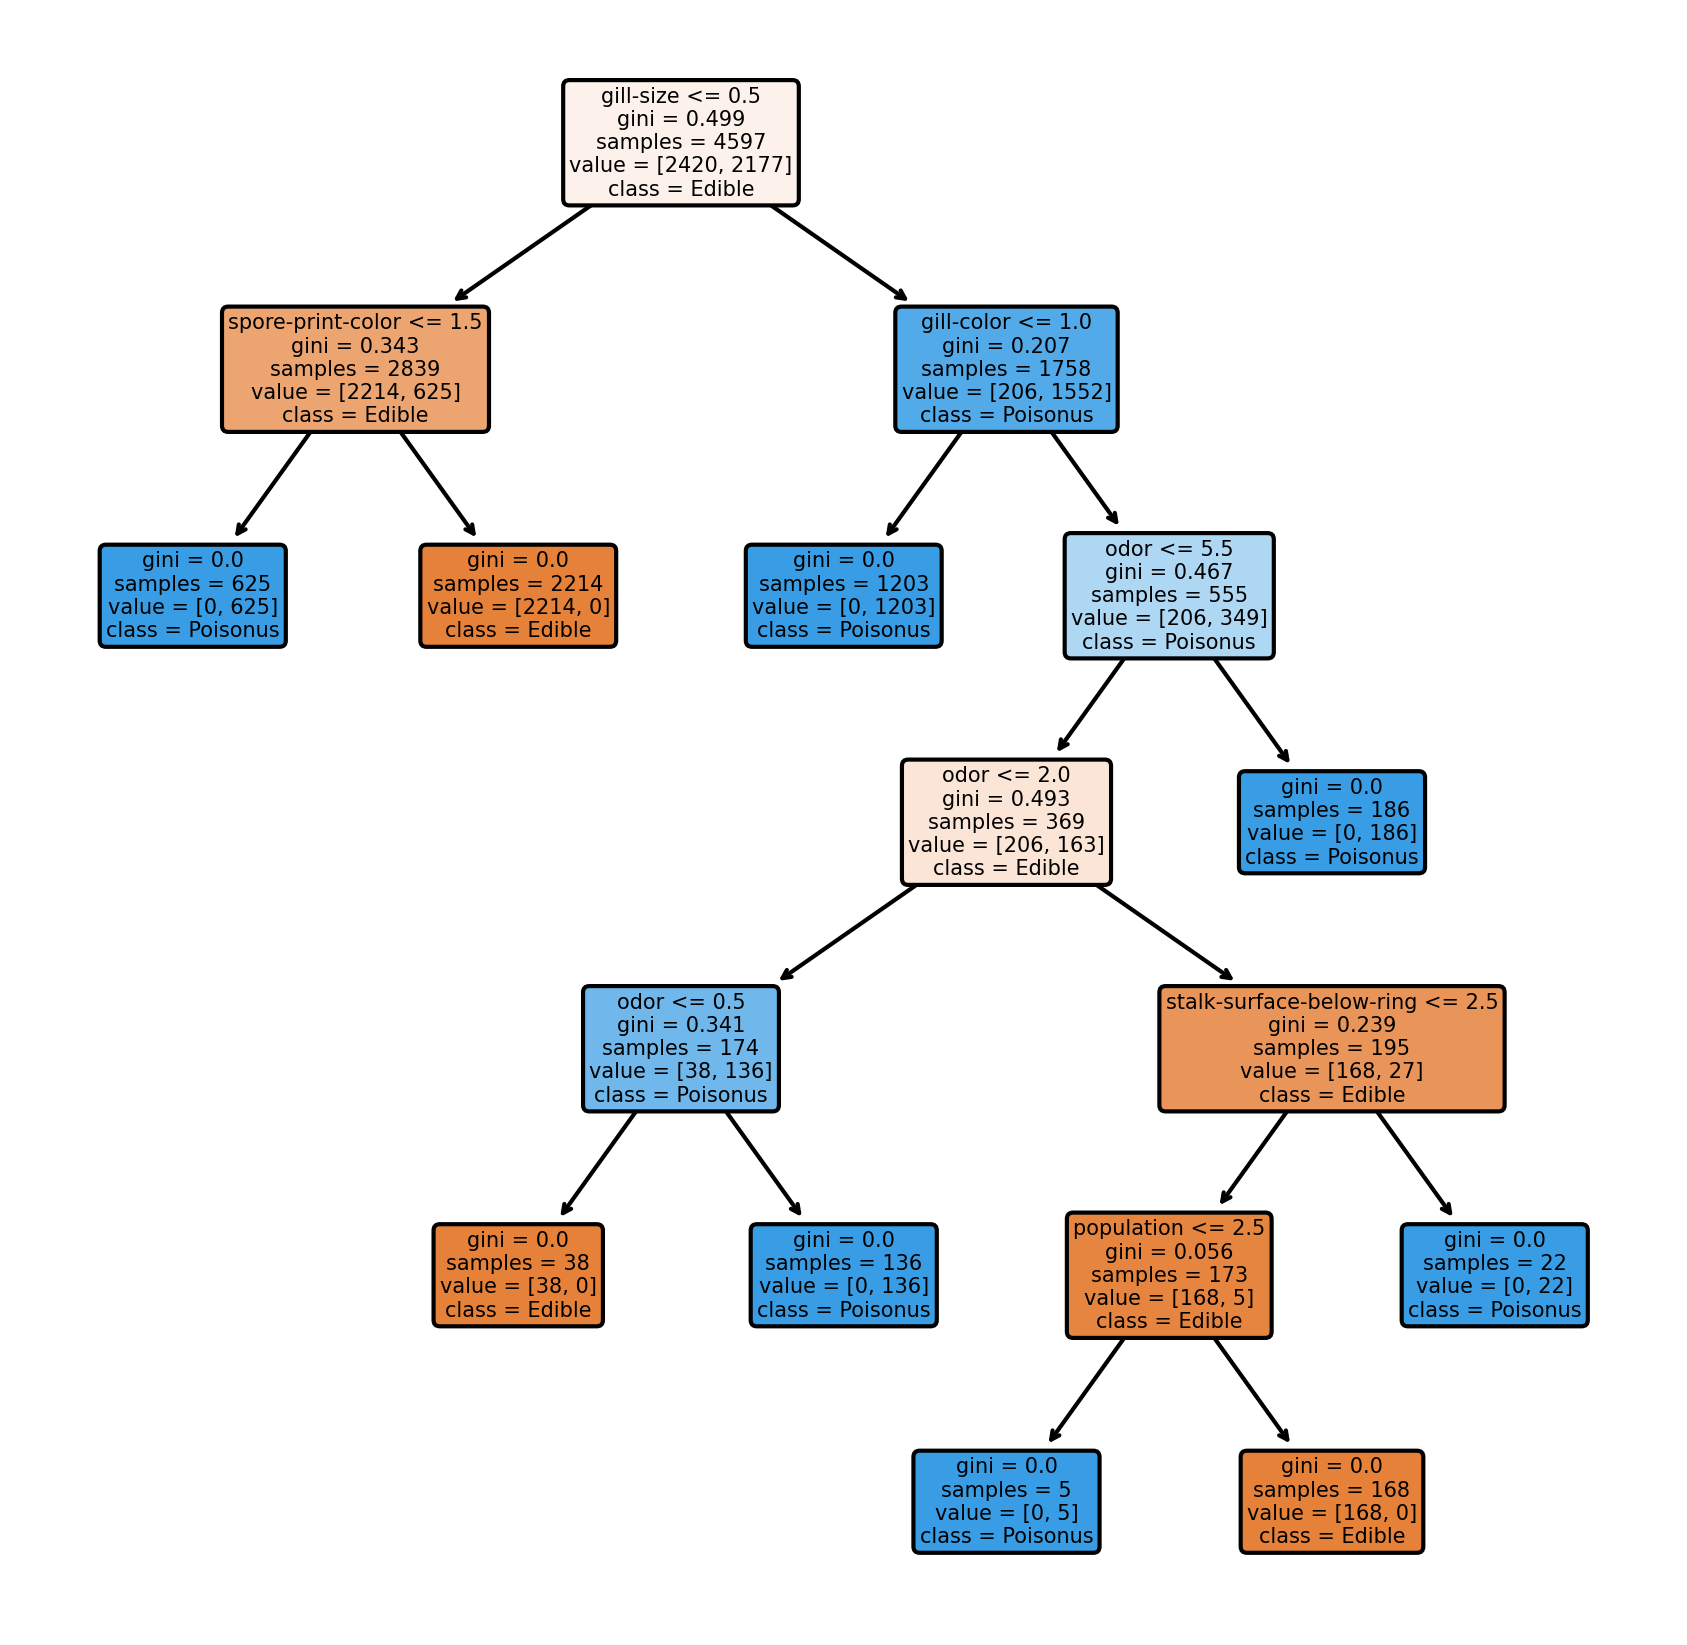

In [74]:
names = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat']
names_class = ["Edible", "Poisonus"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=300)
tree.plot_tree(dt,
               feature_names = names, 
               class_names=names_class,
               rounded = True,
               fontsize = 5,
               filled = True)
fig.savefig('mushroom_dt.png')

### Final metric - AUC ROC curve

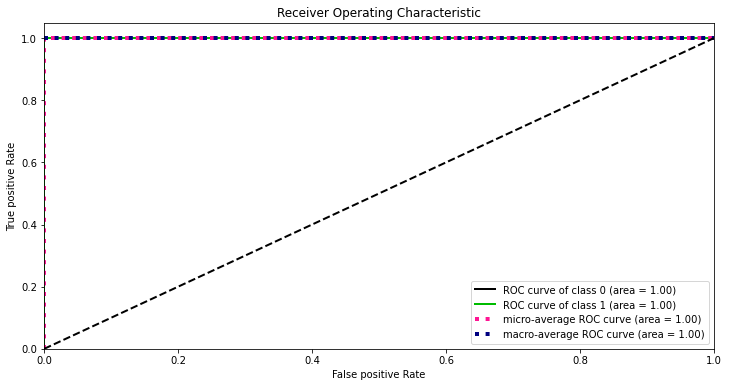

In [75]:
from sklearn.metrics import roc_curve, auc

test_prob = dt.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, test_prob,
                       title="Digits ROC Curve", figsize=(12,6));

plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

- from the above AUC_ROC curve we can conclude that Decision Tree classifier gives the best prediction . Full accuracy 100%

# Saving the model

In [76]:
import joblib
joblib.dump(GCV.best_estimator_, "MushroomDTC.pkl")

['MushroomDTC.pkl']

# Conclusion

In [77]:
import numpy as np
a = np.array(y_test)
predicted = np.array(preddt)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
1966,1,1
1967,1,1
1968,0,0
1969,0,0
